## Project 03: House Price Prediction using XGBoost Regression

## 1. Introduction

House price prediction is a fundamental regression problem in machine learning with significant applications in real estate valuation, urban planning, and financial decision-making. Accurate prediction of property prices is challenging due to complex, non-linear relationships among features, the presence of missing values, and the influence of outliers in real-world datasets.

This project presents an end-to-end machine learning framework for predicting house prices using the **Extreme Gradient Boosting (XGBoost)** regression algorithm. The study emphasizes data preprocessing, statistical outlier detection using the Interquartile Range (IQR) method, exploratory data visualization, and rigorous model evaluation.

## 2. Problem Definition

The objective of this study is to develop a predictive model capable of estimating house prices with high accuracy while minimizing prediction error. Specifically, the model aims to:

* Handle missing values in numerical features
* Detect and remove anomalous data points (outliers)
* Capture non-linear relationships between independent variables and house prices
* Achieve strong generalization performance on unseen data

## 3. Dataset Description

The dataset consists of multiple numerical features describing various attributes of residential properties. These attributes may include size-related variables, structural characteristics, and other quantitative indicators influencing market value.

The dependent variable, **Price**, represents the actual sale price of a house and serves as the target for regression analysis.

## 4. Data Preprocessing

### 4.1 Missing Value Treatment

Missing values in numerical columns were addressed using **median imputation**. The median was selected due to its robustness against extreme values and its ability to preserve the underlying distribution of the data.

### 4.2 Outlier Detection and Removal Using IQR

Outliers can significantly bias model training and degrade predictive performance. To mitigate this issue, the **Interquartile Range (IQR)** method was employed:

* First Quartile (Q1) and Third Quartile (Q3) were computed for each numerical feature
* The IQR was calculated as:
 $$ IQR = Q3 - Q1$$
* Data points falling outside the interval:
  $$ Q1 - 1.5 \times IQR,; Q3 + 1.5 \times IQR] $$
  were identified as outliers and removed from the dataset

This statistical approach ensures a cleaner dataset and improves model stability.

## 5. Exploratory Data Analysis and Visualization

To analyze data distribution and assess the impact of outlier removal, several visualization techniques were utilized:

* **Boxplots** to identify and validate outliers across numerical features
* **Scatter plots** to visualize the relationship between actual and predicted house prices

These visual analyses provided insights into feature distributions and model behavior.

## 6. Model Development

### 6.1 Feature Engineering and Data Splitting

The dataset was divided into training and testing subsets to evaluate model generalization. Feature scaling was applied to normalize numerical variables and facilitate efficient model learning.

### 6.2 XGBoost Regression Model

The **XGBoost Regressor** was selected due to its advanced gradient boosting framework, regularization capabilities, and computational efficiency. XGBoost is particularly effective in handling structured tabular data and capturing complex non-linear interactions.

## 7. Model Evaluation Metrics

Model performance was evaluated using multiple regression metrics to ensure comprehensive assessment:

* **Mean Absolute Error (MAE)**
* **Mean Squared Error (MSE)**
* **Root Mean Squared Error (RMSE)**
* **Coefficient of Determination (R² Score)**

These metrics collectively measure prediction accuracy, error magnitude, and explanatory power.

## 8. Results and Discussion

The experimental results indicate that the XGBoost regression model achieves strong predictive performance with low error values and a high R² score. The application of IQR-based outlier removal significantly enhanced data quality and improved overall model accuracy. Visual comparison between actual and predicted values demonstrates a strong linear alignment, suggesting effective learning of underlying patterns.

## 9. Conclusion

This study demonstrates the effectiveness of **XGBoost regression** for house price prediction when combined with systematic data preprocessing and statistical outlier handling. The proposed approach provides a reliable and interpretable framework for real-world regression problems involving noisy datasets.

Future work may include hyperparameter optimization, feature importance analysis, and deployment of the model in a real-time prediction system.

## 10. Tools and Technologies

* Python
* Pandas and NumPy
* Matplotlib
* Scikit-learn
* XGBoost

### Step 1: Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from xgboost import XGBRegressor

import warnings
warnings.filterwarnings("ignore")

### Step 2: Load Dataset

In [2]:
house_price_dataset = pd.read_csv("data/House Price.csv")

In [3]:
house_price_dataset.head(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.0,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA


### Step 3. Data Exploration

In [4]:
house_price_dataset.shape

(4600, 18)

In [5]:
house_price_dataset.index

RangeIndex(start=0, stop=4600, step=1)

In [6]:
house_price_dataset.columns.to_list()

['date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'street',
 'city',
 'statezip',
 'country']

In [7]:
house_price_dataset.drop(columns='date', inplace=True)

In [8]:
house_price_dataset.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,342000.0,3.0,2.0,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA


In [9]:
house_price_dataset.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [10]:
house_price_dataset.info

<bound method DataFrame.info of              price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0     3.130000e+05       3.0       1.50         1340      7912     1.5   
1     2.384000e+06       5.0       2.50         3650      9050     2.0   
2     3.420000e+05       3.0       2.00         1930     11947     1.0   
3     4.200000e+05       3.0       2.25         2000      8030     1.0   
4     5.500000e+05       4.0       2.50         1940     10500     1.0   
...            ...       ...        ...          ...       ...     ...   
4595  3.081667e+05       3.0       1.75         1510      6360     1.0   
4596  5.343333e+05       3.0       2.50         1460      7573     2.0   
4597  4.169042e+05       3.0       2.50         3010      7014     2.0   
4598  2.034000e+05       4.0       2.00         2090      6630     1.0   
4599  2.206000e+05       3.0       2.50         1490      8102     2.0   

      waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0    

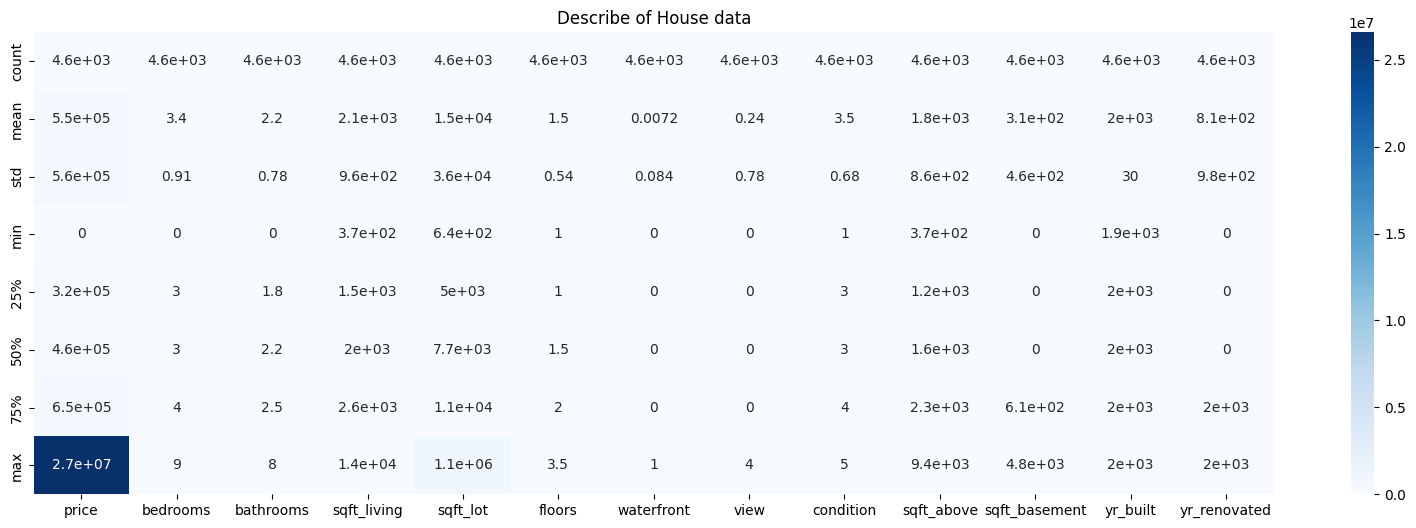

In [11]:
plt.figure(figsize=(20,6))
sns.heatmap(house_price_dataset.describe(),cmap='Blues' , annot=True)
plt.title('Describe of House data')
plt.show()

In [12]:
numerical_cols = house_price_dataset.select_dtypes(include=np.number).columns

### Step 4: Outlier Detection using IQR

In [13]:
for col in numerical_cols:
    Q1 = house_price_dataset[col].quantile(0.25)
    Q3 = house_price_dataset[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outlires = house_price_dataset[(house_price_dataset[col] >= lower) & (house_price_dataset[col] <= upper)]

### Step 5: Outlier Visualization (Boxplot)

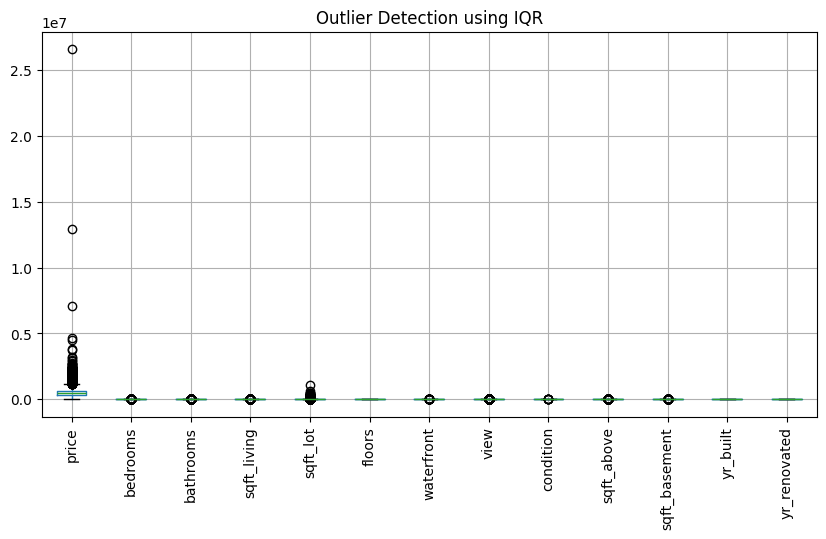

In [14]:
plt.figure(figsize=(10,5))
house_price_dataset[numerical_cols].boxplot()
plt.xticks(rotation=90)
plt.title("Outlier Detection using IQR")
plt.show()


In [15]:
# Remove all string/object columns
house_price_dataset = house_price_dataset.select_dtypes(exclude=['object'])

### Step 6: Feature & Target Split

In [16]:
X = house_price_dataset.drop(['price'], axis=1)
y = house_price_dataset['price']

In [17]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992
...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979
4596,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009
4597,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0
4598,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0


In [18]:
y

0       3.130000e+05
1       2.384000e+06
2       3.420000e+05
3       4.200000e+05
4       5.500000e+05
            ...     
4595    3.081667e+05
4596    5.343333e+05
4597    4.169042e+05
4598    2.034000e+05
4599    2.206000e+05
Name: price, Length: 4600, dtype: float64

### Step 7: Train-Test Split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [20]:
print(X.shape, X_train.shape, X_test.shape)

(4600, 12) (3680, 12) (920, 12)


### Step 8: Feature Scaling

In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### Step 9: XGBoost Model Training

In [22]:
# loading the model
model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    random_state=42
)

In [23]:
# training the model with X_train
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

### Step 10: Prediction & Evaluation


In [24]:
y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 203232.91333823805
MSE: 982545498425.4817
RMSE: 991234.3307338995
R2 Score: 0.036574962516698895


Visualizing the actual Prices and predicted prices

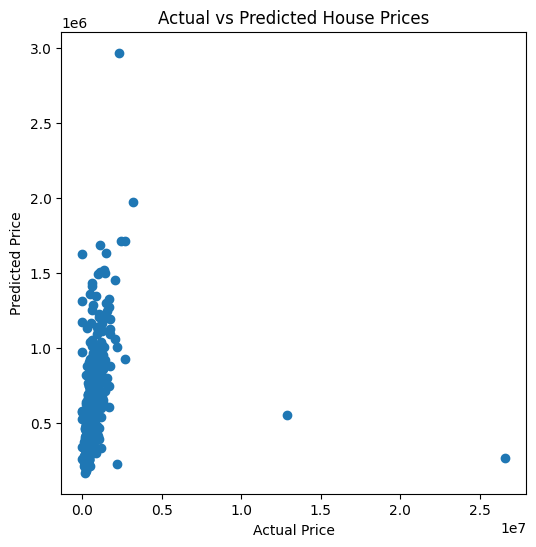

In [25]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.show()

### Model Save

In [26]:
import joblib

joblib.dump(model, "model/xgb_model.pkl")
print("Model saved successfully!")

Model saved successfully!


### Preprocessed Data Save

In [27]:
house_price_dataset.to_csv("data/cleaned_house_price.csv", index=False)

### Scaler Save

In [28]:
joblib.dump(scaler, "model/scaler.pkl")

['model/scaler.pkl']

### Graph Image Save

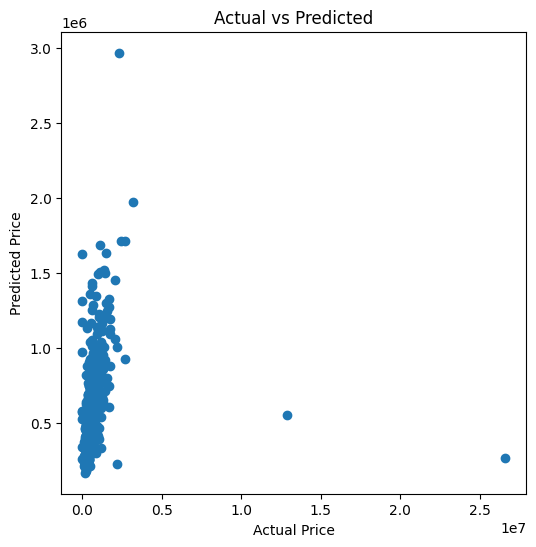

In [29]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted")
plt.savefig("actual_vs_predicted.png")
plt.show()